In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv("Cleaned_Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [86]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [87]:
df=df.drop(["day","month","year"],axis=1)

In [88]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [89]:
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


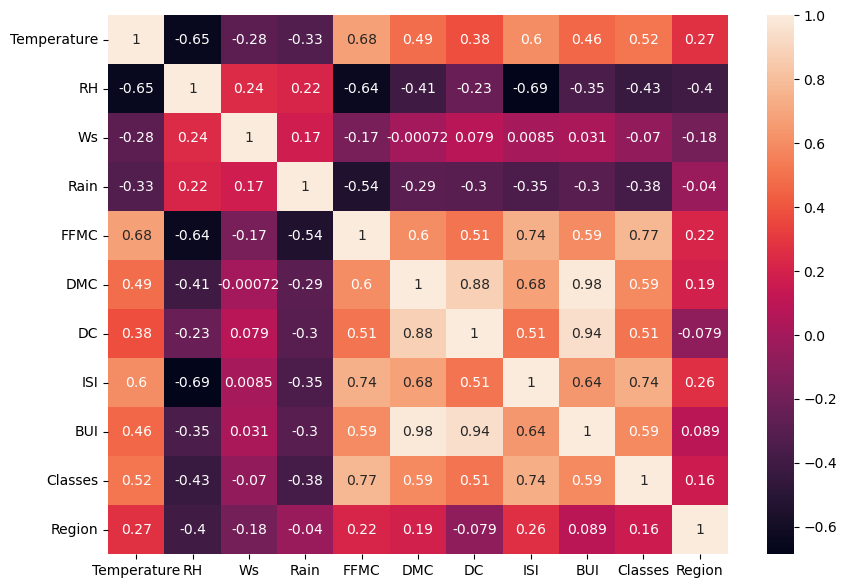

In [91]:
## check for multicollinearity
plt.figure(figsize=(10,7))
sns.heatmap(x.corr(),annot=True)
plt.show()


In [92]:
## make function to detect features with high correlation
def correlation(dataset,threshold):
    col_corr=set() # set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [93]:
corr_features=correlation(x_train,0.85)

In [94]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape, x_test.shape

((194, 9), (49, 9))

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

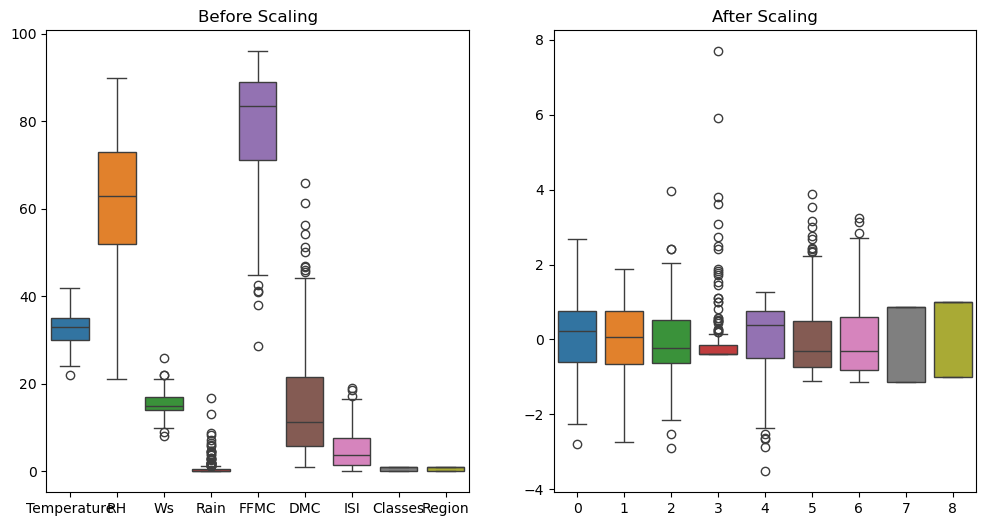

In [96]:
## plot a box plots to seen the effect of scaling
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("After Scaling")
plt.show()

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


Mean absolute error 0.5049978694165654
R2 Score 0.9805895859259883


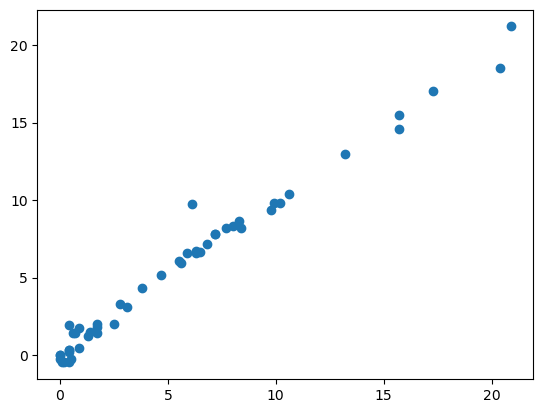

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()


Mean absolute error 1.0093958923873405
R2 Score 0.9430507350726564
Mean Squared error 1.7260423250231411


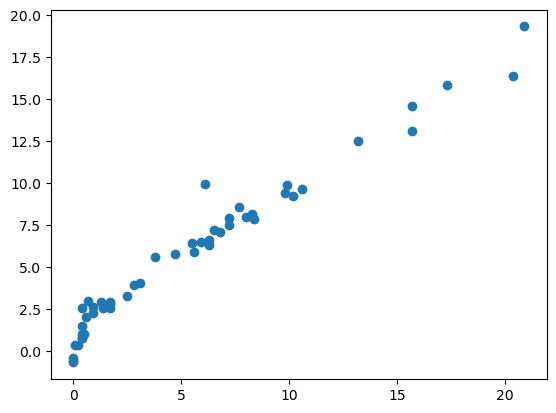

In [99]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error", mse)
plt.scatter(y_test,y_pred)
plt.show()


Mean absolute error 0.519204832584481
R2 Score 0.9801058063273599
Mean Squared error 0.6029616070548663


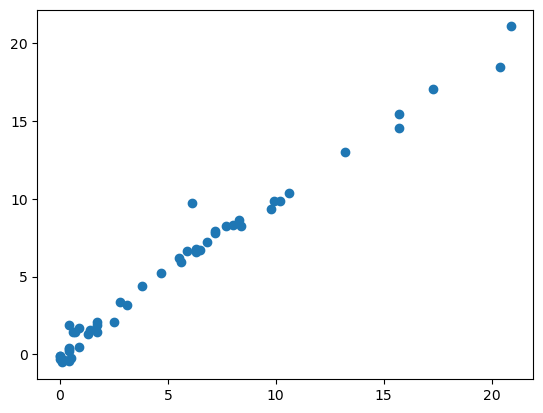

In [100]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error", mse)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 1.6834416340136709
R2 Score 0.8676961352267807
Mean Squared error 4.009921298441002


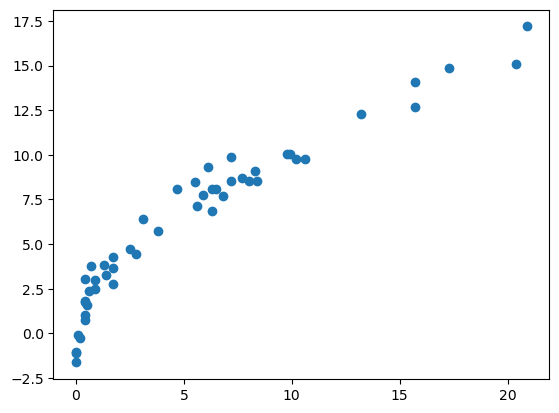

In [101]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred=elasticnet.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error", mse)
plt.scatter(y_test,y_pred)
plt.show()

## Cross Validation

Mean absolute error 0.555671503161787
R2 Score 0.978328234520343
Mean Squared error 0.6568370026125327


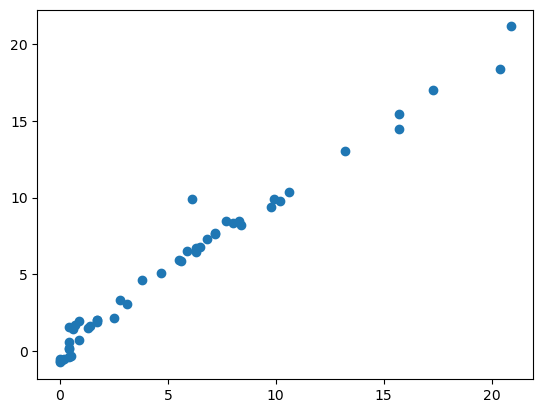

In [102]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pred=lassocv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error", mse)
plt.scatter(y_test,y_pred)
plt.show()

In [103]:
lassocv.alpha_  # best alpha value

0.04391080246587259

Mean absolute error 0.6869262008277159
R2 Score 0.9722193780965623
Mean Squared error 0.8419867979327553


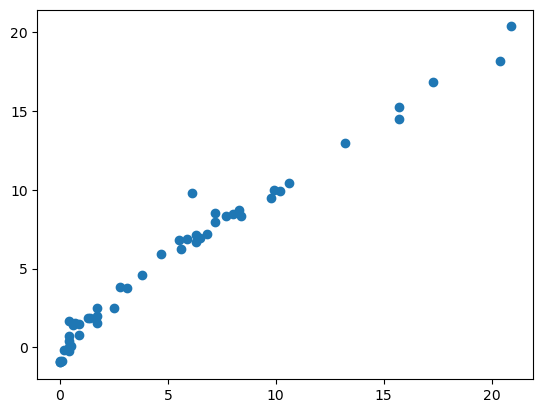

In [104]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error", mse)
plt.scatter(y_test,y_pred)
plt.show()

In [105]:
ridgecv.alpha_  # best alpha value

10.0

In [108]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean absolute error 0.5474580785252844
R2 Score 0.9791218506255925
Mean Squared error 0.6327837511925456


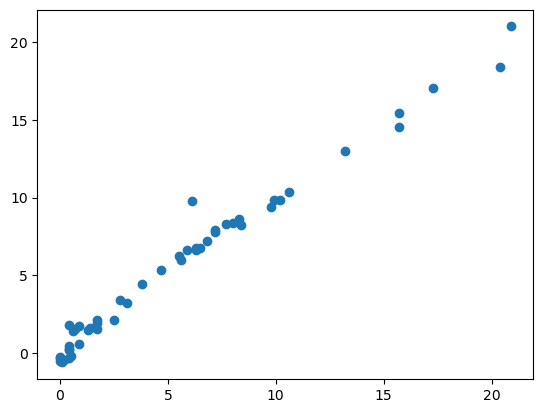

In [106]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=10)
elasticnetcv.fit(x_train_scaled,y_train)
y_pred=elasticnetcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Mean Squared error", mse)
plt.scatter(y_test,y_pred)
plt.show()

In [109]:
elasticnetcv.alpha_  # best alpha value


0.018920591219922706

In [110]:
elasticnetcv.alphas_

array([14.31273339, 13.34810307, 12.44848559, 11.60949933, 10.82705793,
       10.09735046,  9.41682284,  8.78216049,  8.19027227,  7.63827533,
        7.12348114,  6.64338235,  6.19564061,  5.77807517,  5.38865224,
        5.02547512,  4.68677492,  4.37090197,  4.07631781,  3.80158763,
        3.54537335,  3.30642705,  3.08358493,  2.87576163,  2.68194492,
        2.50119081,  2.33261892,  2.17540821,  2.02879298,  1.89205912,
        1.76454067,  1.64561653,  1.53470749,  1.43127334,  1.33481031,
        1.24484856,  1.16094993,  1.08270579,  1.00973505,  0.94168228,
        0.87821605,  0.81902723,  0.76382753,  0.71234811,  0.66433823,
        0.61956406,  0.57780752,  0.53886522,  0.50254751,  0.46867749,
        0.4370902 ,  0.40763178,  0.38015876,  0.35453733,  0.33064271,
        0.30835849,  0.28757616,  0.26819449,  0.25011908,  0.23326189,
        0.21754082,  0.2028793 ,  0.18920591,  0.17645407,  0.16456165,
        0.15347075,  0.14312733,  0.13348103,  0.12448486,  0.11

In [111]:
elasticnetcv.l1_ratio_

0.5

In [112]:
elasticnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 10,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}